# 2.4: Fundamentals of Visualization Libraries Part 2

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
import pandas as pd

# Columns to parse as datetime
parse_dates = ['started_at', 'ended_at']

# Other columns with dtypes
dtype_dict = {
    'ride_id': str,
    'rideable_type': str,
    'start_station_name': str,
    'start_station_id': str,
    'end_station_name': str,
    'end_station_id': str,
    'start_lat': 'float32',
    'start_lng': 'float32',
    'end_lat': 'float32',
    'end_lng': 'float32',
    'member_casual': str,
    'PRCP': float,
    'TAVG': float,
    '_merge': str
}

# Read CSV
df = pd.read_csv(r"C:\Users\valev\CityBike\nyc_data.csv", dtype=dtype_dict, parse_dates=parse_dates)


In [3]:
# Drop _merge column
if '_merge' in df.columns:
    df.drop(columns='_merge', inplace=True)

In [4]:
# Convert string columns to category for memory optimization
categorical_cols = [
    'rideable_type', 
    'start_station_name', 
    'start_station_id', 
    'end_station_name', 
    'end_station_id', 
    'member_casual'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')

# Check memory usage
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29768282 entries, 0 to 29768281
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          object        
 3   ended_at            datetime64[ns]
 4   start_station_name  category      
 5   start_station_id    category      
 6   end_station_name    category      
 7   end_station_id      category      
 8   start_lat           float32       
 9   start_lng           float32       
 10  end_lat             float32       
 11  end_lng             float32       
 12  member_casual       category      
 13  PRCP                float64       
 14  TAVG                float64       
dtypes: category(6), datetime64[ns](1), float32(4), float64(2), object(2)
memory usage: 5.3 GB


In [5]:
# started_at needs to be datetime
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')


In [6]:
# PRCP and TAVG to fload32
df['PRCP'] = df['PRCP'].astype('float32')
df['TAVG'] = df['TAVG'].astype('float32')

In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29768282 entries, 0 to 29768281
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  category      
 5   start_station_id    category      
 6   end_station_name    category      
 7   end_station_id      category      
 8   start_lat           float32       
 9   start_lng           float32       
 10  end_lat             float32       
 11  end_lng             float32       
 12  member_casual       category      
 13  PRCP                float32       
 14  TAVG                float32       
dtypes: category(6), datetime64[ns](2), float32(6), object(1)
memory usage: 3.2 GB


In [8]:
# Calculate trip duration in minutes
df['tripduration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Optional: remove negative or extremely long durations
df_clean = df[(df['tripduration_min'] > 0) & (df['tripduration_min'] < 300)]  # up to 5 hours

# Check the cleaned DataFrame
print(df_clean[['tripduration_min']].describe())

       tripduration_min
count      2.969718e+07
mean       1.440753e+01
std        1.536959e+01
min        1.000233e+00
25%        5.783633e+00
50%        1.012447e+01
75%        1.787093e+01
max        2.999891e+02


In [9]:
df_clean.dtypes

ride_id                       object
rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name          category
start_station_id            category
end_station_name            category
end_station_id              category
start_lat                    float32
start_lng                    float32
end_lat                      float32
end_lng                      float32
member_casual               category
PRCP                         float32
TAVG                         float32
tripduration_min             float64
dtype: object

In [10]:
df_clean.shape

(29697182, 16)

In [11]:
df_clean.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'PRCP', 'TAVG', 'tripduration_min'],
      dtype='object')

In [12]:
df_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,PRCP,TAVG,tripduration_min
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802116,-73.968178,40.804039,-73.945923,member,0.0,21.0,8.801183
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673744,-73.985649,40.688488,-73.991158,member,0.0,35.0,10.821000
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960938,40.745167,-73.986832,member,0.0,28.0,13.868850
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783962,-73.947166,40.745167,-73.986832,member,0.0,35.0,35.037133
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749641,-73.988052,40.745167,-73.986832,member,0.0,21.0,20.573850


In [13]:
# Extract only date (YYYY-MM-DD)
df_clean.insert(0, 'date', df['started_at'].dt.date)

# Verify
df_clean.head()

,date,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,PRCP,TAVG,tripduration_min
0,2022-01-21,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802116,-73.968178,40.804039,-73.945923,member,0.0,21.0,8.801183
1,2022-01-10,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673744,-73.985649,40.688488,-73.991158,member,0.0,35.0,10.821000
2,2022-01-26,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960938,40.745167,-73.986832,member,0.0,28.0,13.868850
3,2022-01-03,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783962,-73.947166,40.745167,-73.986832,member,0.0,35.0,35.037133
4,2022-01-22,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749641,-73.988052,40.745167,-73.986832,member,0.0,21.0,20.573850


In [14]:
# Count missing values per column
missing_counts = df_clean.isna().sum()

# Display counts
print(missing_counts)

date                  0
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
PRCP                  0
TAVG                  0
tripduration_min      0
dtype: int64


### Got it.  df_clean should be the dataframe ready to use

In [32]:
df_clean.to_csv(r"C:\Users\valev\CityBike\nyc_data_clean.csv", index=False)

## 3.	Pick one theme and set it for all plots, and think of the style and the palette you want to use.

In [15]:
# Set style and palette
sns.set_style("dark")
sns.set_palette('Blues_d')

## 4.	Create a bar chart of the top 20 starting stations frequencies. Does the color palette you chose when you set the theme in the previous step make sense in this plot? If not, change the style of this specific plot temporarily. Hint: Does the default setting of the palette contain enough colors?

In [16]:
# Add helper column
df_clean.loc[:, 'value'] = 1

C:\Users\valev\AppData\Local\Temp\ipykernel_2580\2065857311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'value'] = 1


In [17]:
df_clean = df_clean.copy()
df_clean['start_station_name'] = df_clean['start_station_name'].str.replace(r'\t', ' ', regex=True)

In [18]:
# Group and count
df_t = df_clean.groupby('start_station_name', observed=True)['value'].count().reset_index()

In [19]:
df_t

,start_station_name,value
0,1 Ave & E 110 St,21442
1,1 Ave & E 16 St,67082
2,1 Ave & E 18 St,70562
3,1 Ave & E 30 St,45241
4,1 Ave & E 39 St,52162
...,...,...
1751,Wyckoff Ave & Gates Ave,16460
1752,Wyckoff St & 3 Ave,248
1753,Wyckoff St & Nevins St,11472
1754,Wythe Ave & Metropolitan Ave,66185


In [20]:
# Get top 20
top20 = df_t.nlargest(20, 'value')

In [21]:
top20

,start_station_name,value
1583,W 21 St & 6 Ave,128548
1713,West St & Chambers St,122710
494,Broadway & W 58 St,113779
286,6 Ave & W 33 St,105956
8,1 Ave & E 68 St,104495
460,Broadway & E 14 St,98432
484,Broadway & W 25 St,98030
1507,University Pl & E 14 St,96708
462,Broadway & E 21 St,95327
1599,W 31 St & 7 Ave,93843


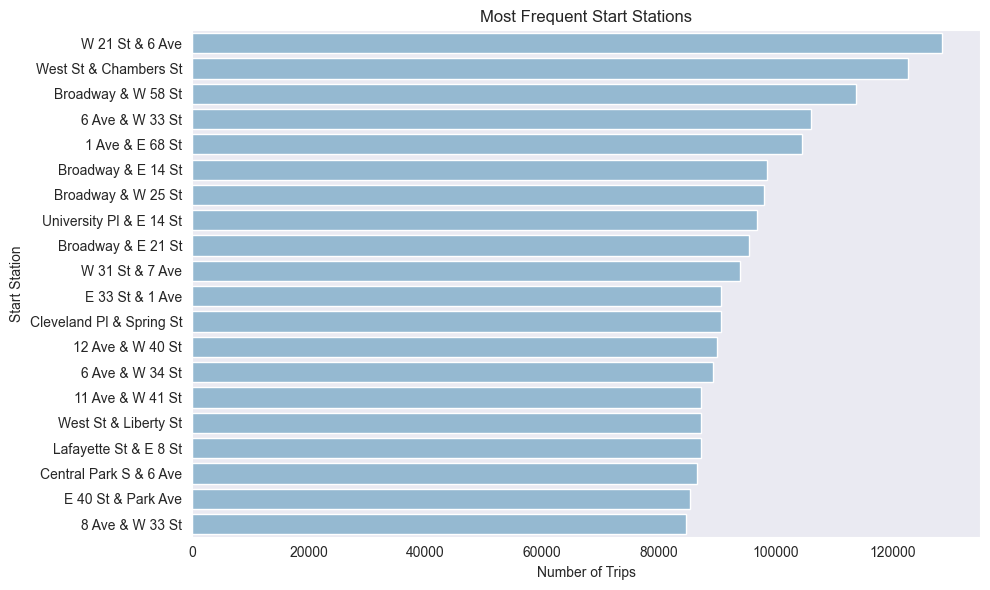

In [22]:
# Plot horizontal bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=top20, x='value', y='start_station_name')
plt.title("Most Frequent Start Stations")
plt.xlabel('Number of Trips')
plt.ylabel('Start Station')
plt.tight_layout()
plt.show()

## I prefer blues and not a range of color palette.  BuPu_r is perhaps another choice but it ended up being to dark on the screen. 

## 5.	Recreate the dual-axis line plot from the previous Exercise using seaborn.

In [23]:
df_clean.columns

Index(['date', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'PRCP', 'TAVG', 'tripduration_min', 'value'],
      dtype='object')

In [24]:
df_clean.dtypes

date                          object
ride_id                       object
rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id            category
end_station_name            category
end_station_id              category
start_lat                    float32
start_lng                    float32
end_lat                      float32
end_lng                      float32
member_casual               category
PRCP                         float32
TAVG                         float32
tripduration_min             float64
value                          int64
dtype: object

In [25]:
# Aggregate daily bike trips and average temperature
daily_stats = df_clean.groupby('date').agg(
    bike_rides_daily=('ride_id', 'count'),
    TAVG=('TAVG', 'mean')
).reset_index()


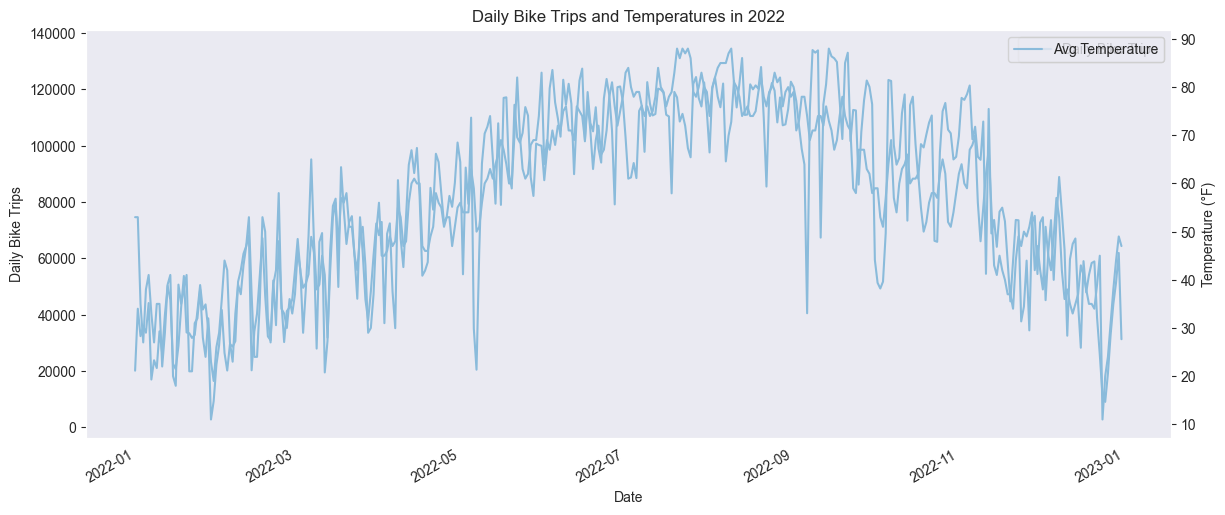

In [26]:
# Plot using twin axes
# Set style and palette
sns.set_style("dark")
sns.set_palette('Blues_d')

fig, ax1 = plt.subplots(figsize=(14,6))
# Line for bike trips
sns.lineplot(data=daily_stats, x='date', y='bike_rides_daily', ax=ax1, label='Daily Bike Trips')
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Bike Trips')
ax1.tick_params(axis='y')

# Secondary y-axis for temperature
ax2 = ax1.twinx()
sns.lineplot(data=daily_stats, x='date', y='TAVG', ax=ax2, label='Avg Temperature')
ax2.set_ylabel('Temperature (°F)')
ax2.tick_params(axis='y')

# Improve layout
fig.autofmt_xdate()
plt.title('Daily Bike Trips and Temperatures in 2022')
plt.show()

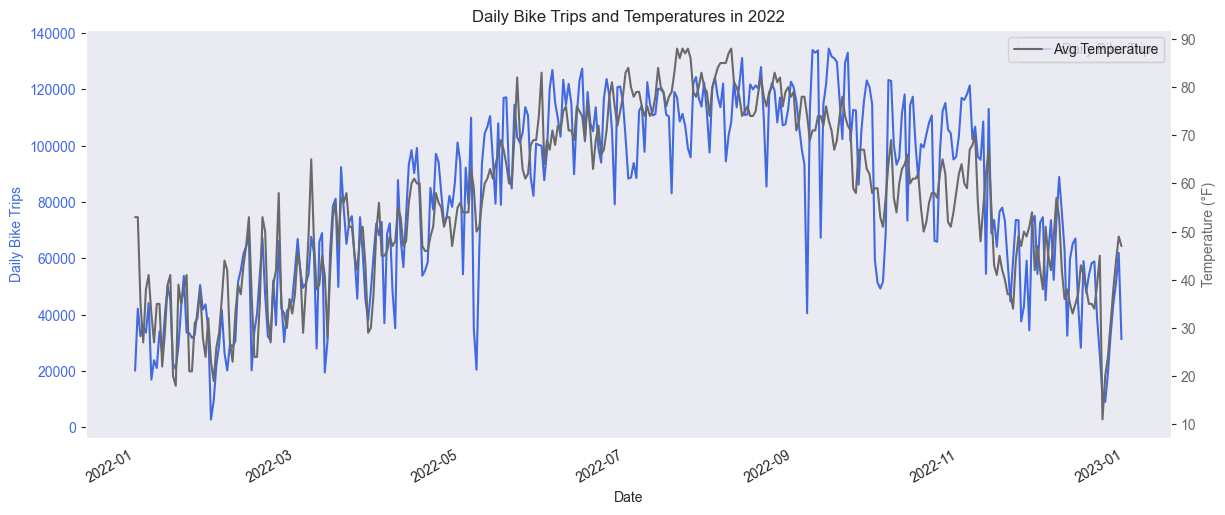

In [27]:
# Plot using twin axes
# Set style and palette
sns.set_style("dark")
sns.set_palette('Blues_d')

fig, ax1 = plt.subplots(figsize=(14,6))
# Line for bike trips
sns.lineplot(data=daily_stats, x='date', y='bike_rides_daily', ax=ax1, color='royalblue', label='Daily Bike Trips')
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Bike Trips', color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')

# Secondary y-axis for temperature
ax2 = ax1.twinx()
sns.lineplot(data=daily_stats, x='date', y='TAVG', ax=ax2, color='dimgray', label='Avg Temperature')
ax2.set_ylabel('Temperature (°F)', color='dimgray')
ax2.tick_params(axis='y', labelcolor='dimgray')

# Save the plot (PNG, high resolution)
plt.savefig("daily_bike_trips_temperature.png", dpi=300, bbox_inches='tight')

# Improve layout
fig.autofmt_xdate()
plt.title('Daily Bike Trips and Temperatures in 2022')
plt.show()

## 6.	Make a box plot of one of the categorical variables in your data set. What does this plot tell you about the variable? Write down a 3 to 5-sentence analysis of the elements of the box plot.

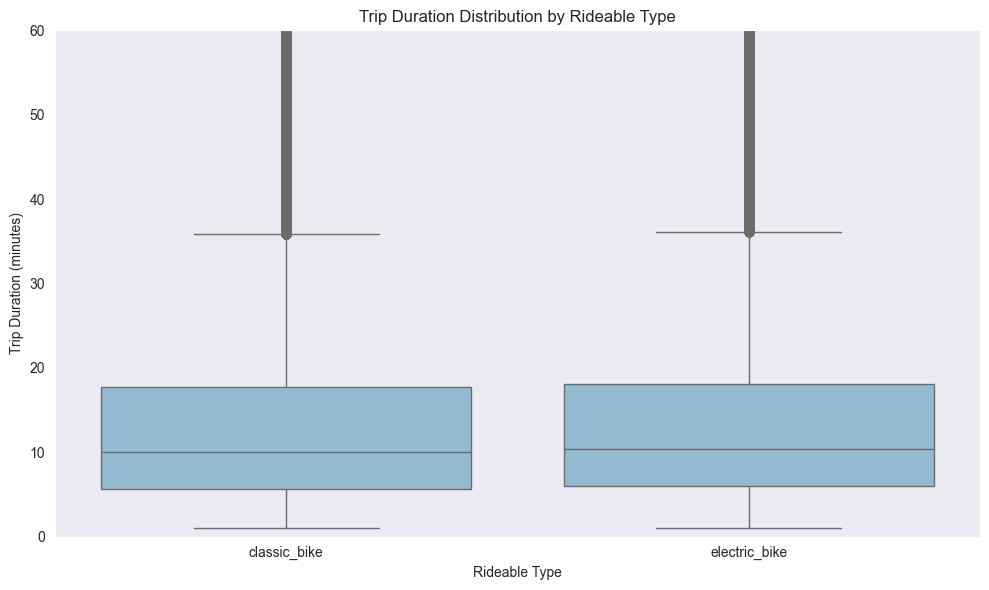

In [28]:
# Example: Boxplot of trip duration by rideable type
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean, x='rideable_type', y='tripduration_min')

plt.title("Trip Duration Distribution by Rideable Type")
plt.xlabel("Rideable Type")
plt.ylabel("Trip Duration (minutes)")
plt.ylim(0, 60)  # Optional: limit y-axis to remove extreme outliers for readability
plt.tight_layout()
# Save the plot
plt.savefig("boxplot_tripduration_by_rideable_type.png", dpi=300, bbox_inches='tight')
plt.show()


### 
    The plot compares classic vs electric bike trip durations. Both have a median trip duration around 10 minutes. The interquartile range boxes show that 50% of trips fall roughly between 5 and 18 minutes for both types, thus suggesting similar typical trip lengths. The whiskers extend to around 35–60 minutes, indicating the spread of longer trips.  However, trips beyond this are considered outliers. Overall, the plot shows that while the central tendency of trip durations is very similar between classic and electric bikes, there are occasional longer trips that stretch the distribution.

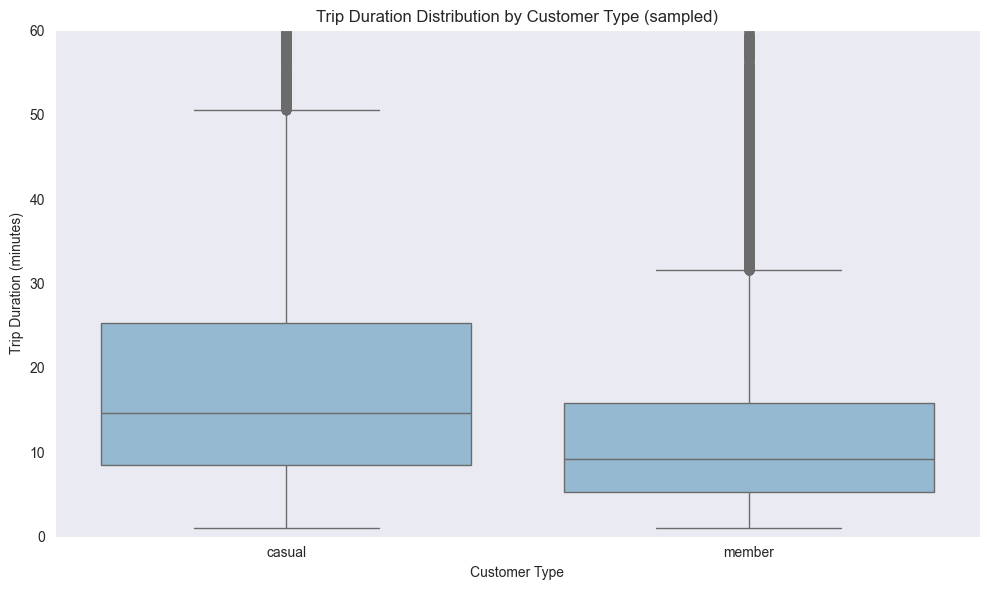

In [29]:
# Example: Boxplot of trip duration by customer type

# Sample 100,000 rows
df_sample = df_clean.sample(100000, random_state=42)

plt.figure(figsize=(10,6))
sns.boxplot(data=df_sample, x='member_casual', y='tripduration_min')

plt.title("Trip Duration Distribution by Customer Type (sampled)")
plt.xlabel("Customer Type")
plt.ylabel("Trip Duration (minutes)")
plt.ylim(0, 60)  # Optional: limit y-axis to remove extreme outliers for readability
plt.tight_layout()
# Save the plot
plt.savefig("boxplot_tripduration_by_customer_type.png", dpi=300, bbox_inches='tight')
plt.show()


### 
    The plot compares casual vs member customer trip durations. Casual customers have a median trip duration of 14 minutes whereas member clients is below 10 minutes. The interquartile range boxes show that 50% of the casual customer spends 10-25 minute trips and a member only 5-15 minutes.  The whiskers extend above 50 minutes for a casual customer.  Overall, a casual customer spends longer trips overall, perhaps for more leisurely trips than a member customer.  

## 7.	Think of how the FacetGrid plot would make sense to aid the analysis questions in the project. Create a FacetGrid and write 2 to 3 sentences analyzing what insight its output brings.

###
    I do not like facetgrids as they take me a lot of time back and forth to discern the differences, although they could provide more depth than an overlap of variables.  

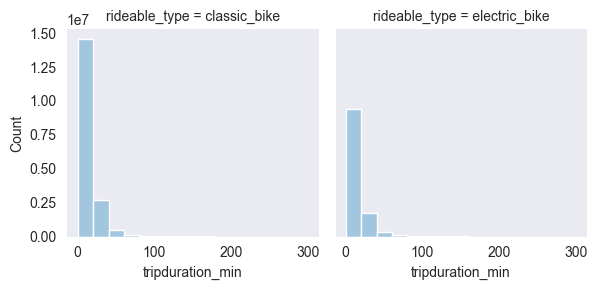

In [31]:
grid = sns.FacetGrid(df_clean, col = "rideable_type")
grid.map(sns.histplot, "tripduration_min", bins = 15)
plt.show()

###
    The classic bike rental has more trips than an electric bike with similar trip durations. Classic bikes would be more readily available to customers than expensive electric styles.  For leisurely shorter rides I would think a customer would choose a classic bike.    